# data

In [ ]:
!pip install transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 96.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 33.9 MB/s eta 0:00:00


In [ ]:
!wget https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil_full_dataset

--2023-10-29 10:28:01--  https://raw.githubusercontent.com/owncodezs/Cyberbullying-classification/main/Tamil_full_dataset
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5587886 (5.3M) [text/plain]
Saving to: ‘Tamil_full_dataset’

Tamil_full_dataset  100%[===================>]   5.33M  18.4MB/s    in 0.3s    

2023-10-29 10:28:02 (18.4 MB/s) - ‘Tamil_full_dataset’ saved [5587886/5587886]



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Load your dataset
data = pd.read_csv('/content/Tamil_full_dataset')

In [ ]:
data

,text,category,Length,Word_count,mean_word_length,mean_sent_length,isenglish
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000,72.0,False
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0,True
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000,68.0,False
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333,91.0,False
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0,True
...,...,...,...,...,...,...,...
38209,Yov padam vera lvl la hit aaga poguthu,NOT,38,8,3.875000,38.0,True
38210,Super star fans hit like waiting,NOT,33,6,4.500000,33.0,True
38211,Seems to be Hindi Film Ek Tha Tiger Remake..,OFF,44,9,4.000000,44.0,True
38212,Apa idhulla sk van yarum illayada,OFF,33,6,4.666667,33.0,True


In [ ]:
data.rename(columns={'category':'label_text'}, inplace=True)
data['label_text'].value_counts()

NOT    28833
OFF     9381
Name: label_text, dtype: int64

In [ ]:
labels=data['label_text']
unique_labels = data['label_text'].unique()
label2id = {label: i for i, label in enumerate(unique_labels)}
id2label = {i: label for label, i in label2id.items()}

# Convert labels to numerical values
data['lable'] = [label2id[label] for label in data['label_text']]
print(label2id)
print(id2label)

{'NOT': 0, 'OFF': 1}
{0: 'NOT', 1: 'OFF'}


In [ ]:
data

,text,label_text,Length,Word_count,mean_word_length,mean_sent_length,isenglish,lable
0,வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான ...,NOT,72,8,8.125000,72.0,False,0
1,அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வ...,OFF,80,11,6.363636,80.0,True,1
2,அருமை எவதொட்டாலும் வெட்டுடா அடிச்சா திருப்பி அ...,OFF,68,8,7.625000,68.0,False,1
3,எங்கள் சாதியின் குல தெய்வம் திரௌபதி அம்மன் அர...,NOT,91,12,6.583333,91.0,False,0
4,trailer பார்த்துட்டு ஆய்த எழுத்து சூர்யா ஞாபகம...,NOT,76,10,6.500000,76.0,True,0
...,...,...,...,...,...,...,...,...
38209,Yov padam vera lvl la hit aaga poguthu,NOT,38,8,3.875000,38.0,True,0
38210,Super star fans hit like waiting,NOT,33,6,4.500000,33.0,True,0
38211,Seems to be Hindi Film Ek Tha Tiger Remake..,OFF,44,9,4.000000,44.0,True,1
38212,Apa idhulla sk van yarum illayada,OFF,33,6,4.666667,33.0,True,1


## adan

In [ ]:
  import torch
  import torch.nn as nn
  from transformers import BertTokenizer, BertForSequenceClassification, AdamW
  from torch.utils.data import DataLoader, TensorDataset
  from sklearn.model_selection import train_test_split
  from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, cohen_kappa_score ,roc_curve, roc_auc_score
  from imblearn.over_sampling import SMOTE
  import matplotlib.pyplot as plt
  from tqdm import tqdm
  import numpy as np
  import itertools
  import time

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
model_name= "bert-base-multilingual-uncased"
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=unique_labels.size,label2id=label2id,id2label=id2label)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# import pandas as pd

# # Assuming you have a DataFrame named 'data' with 'text' and 'label' columns
# # Replace 'data' with your actual dataset
# # You may want to shuffle your data if it's not already shuffled

# data_class_0 = data[data['lable'] == 0]
# data_class_1 = data[data['lable'] == 1]

# # Calculate the number of records to select from each class
# num_samples_per_class = 2500

# # Randomly select records from each class
# sampled_data_class_0 = data_class_0.sample(n=num_samples_per_class, random_state=42)
# sampled_data_class_1 = data_class_1.sample(n=num_samples_per_class, random_state=42)

# # Combine the selected records from both classes
# balanced_dataset = pd.concat([sampled_data_class_0, sampled_data_class_1])

# # Now, 'balanced_dataset' contains 5000 records with a balanced class distribution
# balanced_dataset

In [ ]:
X_ , y_  = data['text'], data['lable']

X_train, X_temp, y_train, y_temp = train_test_split(X_,y_, test_size=0.2, random_state=42, stratify=y_)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
y_train.value_counts() , y_train.count()

(0    23066
 1     7505
 Name: lable, dtype: int64,
 30571)

In [ ]:
y_val.value_counts() ,y_val.count()

(0    2883
 1     938
 Name: lable, dtype: int64,
 3821)

In [ ]:
y_test.value_counts()  , y_test.count()

(0    2884
 1     938
 Name: lable, dtype: int64,
 3822)

In [ ]:
max_length = 128  # Adjust as needed

X_train_encoded = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, pad_to_max_length=True) for text in data['text'].to_list()]
X_test_encoded = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, pad_to_max_length=True) for text in X_test]
X_val_encoded = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, pad_to_max_length=True) for text in X_val]

# Convert data to PyTorch tensors
X_train_encoded = torch.tensor(X_train_encoded)
y_train = torch.tensor(data['lable'].to_list())
X_test_encoded = torch.tensor(X_test_encoded)
y_test = torch.tensor(y_test.to_list())
X_val_encoded = torch.tensor(X_val_encoded)
y_val = torch.tensor(y_val.to_list())

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2606: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
model.to('cuda')
X_train_resampled = X_train_encoded.to('cuda')
y_train_resampled = y_train.to('cuda')
X_val = X_val_encoded.to('cuda')  # Move validation data to CUDA
y_val = y_val.to('cuda')  # Move validation labels to CUDA

In [ ]:

# Define the BERT model for sequence classification

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

# Create DataLoader objects
train_dataset = TensorDataset(X_train_resampled, y_train_resampled)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = TensorDataset(X_val_encoded, y_val)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)




/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3:   0%|          | 0/1195 [00:00<?, ?it/s]We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Epoch 1/3, Train Loss: 0.4369, Train Accuracy: 0.7942, ROC AUC: 0.8046, Time: 828.72


Epoch 1/3, Validation Accuracy: 0.8516


Epoch 2/3, Train Loss: 0.3424, Train Accuracy: 0.8438, ROC AUC: 0.8940, Time: 827.57


Epoch 2/3, Validation Accuracy: 0.8927


Epoch 3/3, Train Loss: 0.2869, Train Accuracy: 0.8725, ROC AUC: 0.9282, Time: 826.97


Epoch 3/3, Validation Accuracy: 0.9173


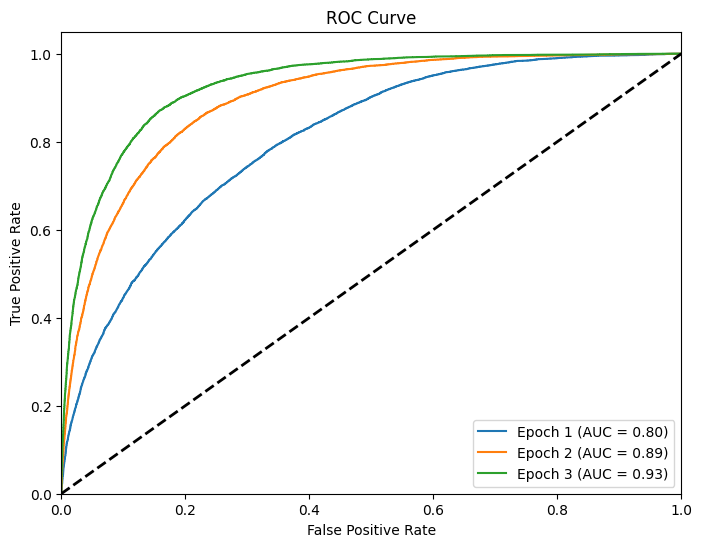

In [ ]:
num_epochs = 3
# Create empty lists to store ROC data for each epoch
fpr_list = []
tpr_list = []
roc_auc_list = []

for epoch in range(num_epochs):
    start_time = time.time()
    model.train()
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    true_labels = []
    predicted_scores = []

    # Create a tqdm progress bar
    pbar = tqdm(train_dataloader, leave=False, desc=f'Epoch {epoch+1}/{num_epochs}')

    for batch in pbar:
        inputs, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.logits, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

        true_labels.extend(labels.cpu().numpy())
        predicted_scores.extend(outputs.logits[:, 1].cpu().detach().numpy())

        # Update the progress bar
        pbar.set_postfix(loss=total_loss / (total_samples + 1e-7), accuracy=correct_predictions / total_samples)

    average_train_loss = total_loss / len(train_dataloader)
    train_accuracy = correct_predictions / total_samples
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Calculate ROC data
    fpr, tpr, _ = roc_curve(true_labels, predicted_scores)
    roc_auc = auc(fpr, tpr)

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    roc_auc_list.append(roc_auc)

    # Print ROC AUC for the current epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {average_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, ROC AUC: {roc_auc:.4f}, Time: {elapsed_time:.2f}")

    # Validation loop
    model.eval()
    val_correct_predictions = 0
    val_total_samples = 0

    for batch in tqdm(val_dataloader, leave=False, desc=f'Validation (Epoch {epoch+1}/{num_epochs}'):
        inputs, labels = batch
        with torch.no_grad():
            inputs = inputs.to('cuda')  # Move inputs to CUDA
            outputs = model(inputs, labels=labels)
            _, predicted = torch.max(outputs.logits, 1)
            val_correct_predictions += (predicted == labels).sum().item()
            val_total_samples += labels.size(0)

    val_accuracy = val_correct_predictions / val_total_samples

    # Print validation accuracy for the current epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {val_accuracy:.4f}")

# Plot ROC curves for each epoch
plt.figure(figsize=(8, 6))
for epoch in range(num_epochs):
    plt.plot(fpr_list[epoch], tpr_list[epoch], label=f'Epoch {epoch+1} (AUC = {roc_auc_list[epoch]:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
model.eval()
y_pred = []
with torch.no_grad():
    for batch in tqdm(DataLoader(X_test_encoded, batch_size=32), leave=False, desc='Testing'):
        inputs = batch.to('cuda')
        logits = model(inputs).logits
        _, predicted = torch.max(logits, 1)
        y_pred.extend(predicted.cpu().numpy())

print("")
print(classification_report(y_test.numpy(), y_pred))
print(f"Kappa value {cohen_kappa_score(y_test.numpy(), y_pred):.2f}")
print(f"Confuction matrix{confusion_matrix(y_test.numpy(), y_pred)}")
# output

#               precision    recall  f1-score   support

#            0       0.96      0.93      0.95      5734
#            1       0.82      0.90      0.86      1909

#     accuracy                           0.92      7643
#    macro avg       0.89      0.92      0.90      7643
# weighted avg       0.93      0.92      0.93      7643

# Kappa value 0.80
# Confuction matrix
#  [[5354  380]
#  [ 198 1711]]


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2884
           1       0.89      0.77      0.82       938

    accuracy                           0.92      3822
   macro avg       0.91      0.87      0.89      3822
weighted avg       0.92      0.92      0.92      3822

Kappa value 0.77
Confuction matrix[[2790   94]
 [ 214  724]]


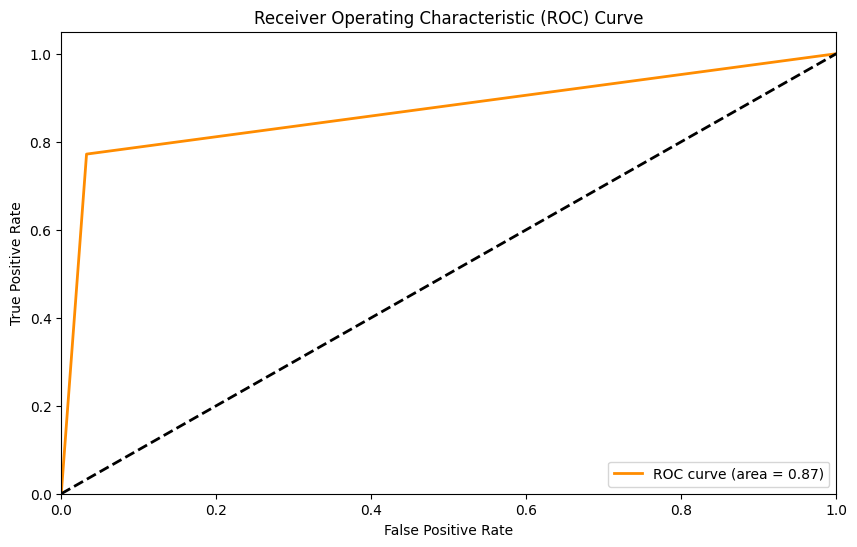

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test.numpy(), y_pred)
roc_auc = roc_auc_score(y_test.numpy(), y_pred)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import os
model_save_path = "ML_tamil"  # Replace with your desired path

# Save the model and its configuration
model.save_pretrained(model_save_path)

# Optionally, save the tokenizer as well
tokenizer.save_pretrained(model_save_path)

torch.save(optimizer.state_dict(), os.path.join(model_save_path, 'optimizer.pt'))

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Define the directory where the model was saved
model_load_path = "/content/ML_tamil"  # Replace with the actual path

# Load the saved model and tokenizer
loaded_model = BertForSequenceClassification.from_pretrained(model_load_path)
loaded_tokenizer = BertTokenizer.from_pretrained(model_load_path)

# Optionally, load the optimizer if you saved it
loaded_optimizer = AdamW(loaded_model.parameters())
loaded_optimizer.load_state_dict(torch.load(os.path.join(model_load_path, 'optimizer.pt')))




/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Predicted Class: 0


In [ ]:
id2label = {
    "0": "NOT",
    "1": "OFF"
}


In [ ]:
# Now you can use the loaded model to classify text
text_to_classify = "அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வருவேன்னு தான் சொல்லிட்டு இருக்காரா	"
inputs = loaded_tokenizer(text_to_classify, return_tensors='pt', padding=True, truncation=True)
outputs = loaded_model(**inputs)
logits = outputs.logits
probabilities = torch.softmax(logits, dim=1)
predicted_class_id = torch.argmax(probabilities, dim=1).item()

# Use the id2label mapping to get the human-readable label
predicted_label = id2label.get(str(predicted_class_id), "Unknown")

print(f"Predicted Label: {predicted_label}")

Predicted Label: OFF


# Test the Model

In [ ]:
def classify(text):
    max_length = 128
    word_encoded = tokenizer.encode(text, add_special_tokens=True, max_length=max_length)
    print(f"{word_encoded}")
    word_tensor = torch.tensor(word_encoded).unsqueeze(0).to('cuda')

    model.eval()
    with torch.no_grad():
        logits = model(word_tensor).logits
        _, predicted = torch.max(logits, 1)

    predicted_label = id2label[predicted.item()]

    print(f"The word '{text}' is classified as '{predicted_label}'.")

In [ ]:
classify( "அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வருவேன்னு தான் சொல்லிட்டு இருக்காரா	")
classify( "வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான சம்பவம் காத்துட்டு இருக்கு	")

The word 'அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வருவேன்னு தான் சொல்லிட்டு இருக்காரா	' is classified as 'OFF'.
The word 'வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான சம்பவம் காத்துட்டு இருக்கு	' is classified as 'NOT'.


In [ ]:
text_  = "அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வருவேன்னு தான் சொல்லிட்டு இருக்காரா	"
text_ = text_.split()
print(f"Before short: {text_}")
text_.sort()
print(f"After short :{text_}")
text_ = ' '.join(text_)
print(f" short      : {text_}")
classify(text_)

Before short: ['அப்ப', '96', 'to', '2016;', 'வரைக்கும்', 'ரஜினி', 'அரசியலுக்கு', 'வருவேன்னு', 'தான்', 'சொல்லிட்டு', 'இருக்காரா']
After short :['2016;', '96', 'to', 'அப்ப', 'அரசியலுக்கு', 'இருக்காரா', 'சொல்லிட்டு', 'தான்', 'ரஜினி', 'வருவேன்னு', 'வரைக்கும்']
 short      : 2016; 96 to அப்ப அரசியலுக்கு இருக்காரா சொல்லிட்டு தான் ரஜினி வருவேன்னு வரைக்கும்
The word '2016; 96 to அப்ப அரசியலுக்கு இருக்காரா சொல்லிட்டு தான் ரஜினி வருவேன்னு வரைக்கும்' is classified as 'OFF'.


In [ ]:
text_  = "வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான சம்பவம் காத்துட்டு இருக்கு	"
text_ = text_.split()
print(f"Before short: {text_}")
text_.sort()
print(f"After short :{text_}")
text_ = ' '.join(text_)
print(f" short      : {text_}")
classify(text_)

Before short: ['வணக்கம்', 'டா', 'மாப்ள', 'வேதாரண்யத்துலேருந்து..', 'தரமான', 'சம்பவம்', 'காத்துட்டு', 'இருக்கு']
After short :['இருக்கு', 'காத்துட்டு', 'சம்பவம்', 'டா', 'தரமான', 'மாப்ள', 'வணக்கம்', 'வேதாரண்யத்துலேருந்து..']
 short      : இருக்கு காத்துட்டு சம்பவம் டா தரமான மாப்ள வணக்கம் வேதாரண்யத்துலேருந்து..
The word 'இருக்கு காத்துட்டு சம்பவம் டா தரமான மாப்ள வணக்கம் வேதாரண்யத்துலேருந்து..' is classified as 'NOT'.


# BERT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install transformers torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 27.7 MB/s eta 0:00:00


In [15]:
import json

model_save_path = "/content/drive/MyDrive/ML_tamil"
loaded_model = BertForSequenceClassification.from_pretrained(model_save_path)
loaded_tokenizer = BertTokenizer.from_pretrained(model_save_path)

config_path = os.path.join(model_save_path, "config.json")
with open(config_path, "r") as config_file:
    config = json.load(config_file)

id2label = {int(k): v for k, v in config["id2label"].items()}



In [10]:
def classfy(custom_text):
  custom_encoded = loaded_tokenizer(custom_text, padding=True, truncation=True, return_tensors="tf")
  custom_input = {
      "input_ids": custom_encoded["input_ids"],
      "attention_mask": custom_encoded["attention_mask"],
      "token_type_ids": custom_encoded["token_type_ids"]
  }

  predictions = loaded_model.predict(custom_input)
  predicted_class_id = tf.argmax(predictions, axis=-1).numpy()[0]
  print("\n",predicted_class_id )
  predicted_class_label = id2label[predicted_class_id]

  print("Custom Input:", custom_text)
  print("Predicted Sentiment:", predicted_class_label)


In [19]:
# custom_input_text = "அப்ப 96 to 2016; வரைக்கும் ரஜினி அரசியலுக்கு வருவேன்னு தான் சொல்லிட்டு இருக்காரா	"
custom_input_text = "வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான சம்பவம் காத்துட்டு இருக்கு"


In [20]:
inputs = loaded_tokenizer(custom_input_text, return_tensors='pt', padding=True, truncation=True)


In [64]:
input_ids_list = [tensor.tolist() for tensor in inputs["input_ids"]][0]
attention_mask = [tensor.tolist() for tensor in inputs["attention_mask"]][0]

ids_to_string =  [loaded_tokenizer._convert_id_to_token(ids) for ids in input_ids_list]

print(f"Text           : {custom_input_text }")
print(f"input_ids      : {input_ids_list }")
print(f"attention_mask : {attention_mask}")
print(f"ids to string  : {ids_to_string}")



Text           : வணக்கம் டா மாப்ள வேதாரண்யத்துலேருந்து.. தரமான சம்பவம் காத்துட்டு இருக்கு
input_ids      : [101, 818, 26950, 38452, 805, 13744, 811, 13744, 12382, 19851, 818, 19563, 90982, 13047, 26950, 68150, 14814, 13146, 55541, 18619, 20252, 119, 119, 807, 32538, 14405, 802, 12005, 12382, 40841, 800, 46095, 14814, 28256, 59402, 18727, 102]
attention_mask : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ids to string  : ['[CLS]', 'வ', '##ண', '##ககம', 'ட', '##ா', 'ம', '##ா', '##ப', '##ள', 'வ', '##ே', '##தா', '##ர', '##ண', '##யத', '##து', '##ல', '##ேர', '##ு', '##நது', '.', '.', 'த', '##ரம', '##ான', 'ச', '##ம', '##ப', '##வம', 'க', '##ாத', '##து', '##டடு', 'இரு', '##ககு', '[SEP]']


In [66]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load the Multilingual BERT tokenizer and model
model_name = "bert-base-multilingual-cased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Input text
input_text = "Hello, how are you? 你好吗?"

# Tokenize the input text
input_ids = tokenizer.encode(input_text, add_special_tokens=True, return_tensors="pt")

# Pass the tokenized input through the model to get contextual embeddings
output = model(input_ids)

# The output contains hidden states, let's get the contextual embeddings from the last layer
contextual_embeddings = output.last_hidden_state

# Print the contextual embeddings
print("Contextual Embeddings Shape:", contextual_embeddings.shape)
print(contextual_embeddings)


Contextual Embeddings Shape: torch.Size([1, 12, 768])
tensor([[[-0.0648,  0.1676,  0.0286,  ...,  0.5456,  0.1330,  0.1814],
         [-0.2482,  0.2859,  0.4124,  ...,  0.4812, -0.5670, -0.2759],
         [-0.2562,  0.0778,  0.1163,  ...,  0.2386,  0.1488,  0.4060],
         ...,
         [-0.1402,  0.3930,  0.2748,  ...,  0.3864,  0.1163,  0.3087],
         [ 0.1267,  0.0364,  0.3236,  ...,  0.7334,  0.1143,  0.1619],
         [ 0.1227,  0.0642,  0.3958,  ...,  0.6769,  0.2026,  0.2336]]],
       grad_fn=<NativeLayerNormBackward0>)
